In [1]:
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# See a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Import modules for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# understand the passengers breakdown

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


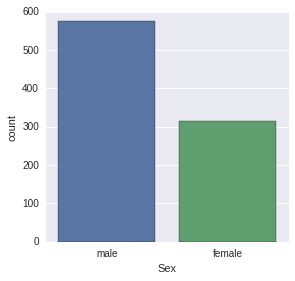

In [7]:
sns.factorplot('Sex',kind='count',data=titanic_df)

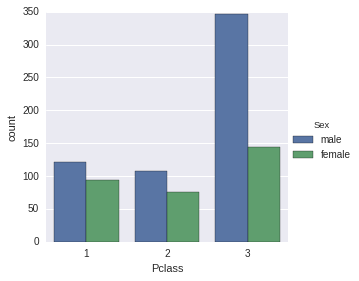

In [8]:
sns.factorplot('Pclass',kind='count',data=titanic_df,hue='Sex')

In [11]:
# Function to sort through the gender / child (>18 years old)
def gender_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 18:
        return 'child'
    else:
        return sex
    

# Define a new column called 'person'
titanic_df['person'] = titanic_df[['Age','Sex']].apply(gender_child,axis=1)

In [13]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


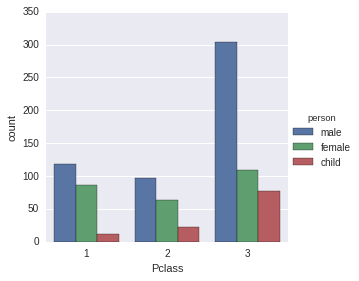

In [14]:
sns.factorplot('Pclass',kind='count',data=titanic_df,hue='person')

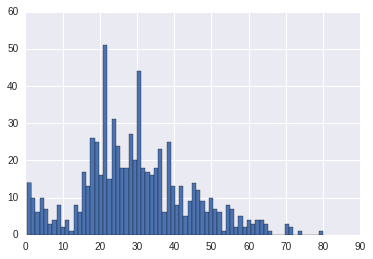

In [15]:
titanic_df['Age'].hist(bins=70)

In [18]:
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

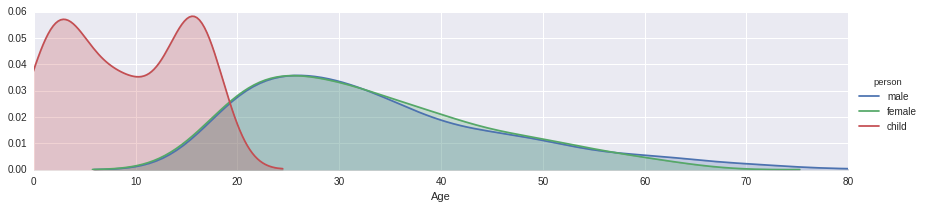

In [21]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)

# map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Add a legend
fig.add_legend()

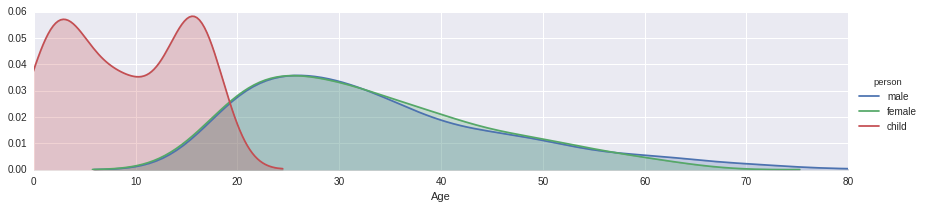

In [22]:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

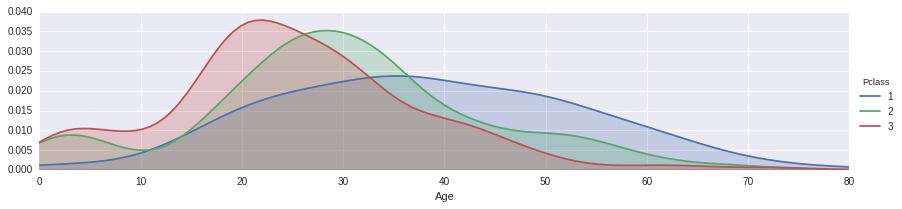

In [23]:

fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [24]:
# Drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

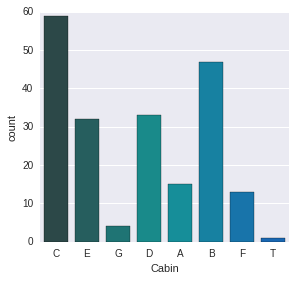

In [26]:
# Extract letter for the deck level with a loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',kind='count',data=cabin_df,palette='winter_d')

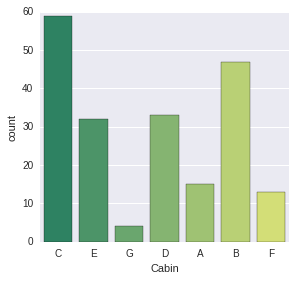

In [27]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
# Factor Plot
sns.factorplot('Cabin',kind='count',data=cabin_df,palette='summer')

/home/mister/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


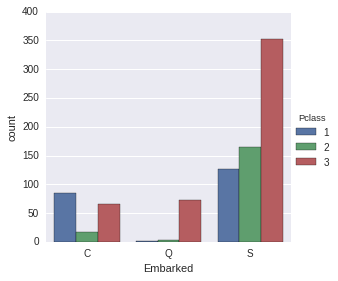

In [28]:
# Factor Plot, with x_order argument
sns.factorplot('Embarked',kind='count',data=titanic_df,hue='Pclass',x_order=['C','Q','S'])

In [29]:
# Add a new column to define alone

# Add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [30]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/home/mister/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


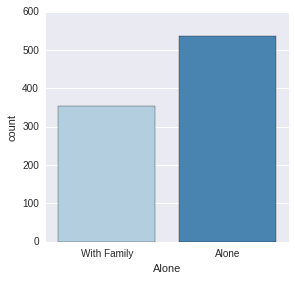

In [31]:
sns.factorplot('Alone',kind='count',data=titanic_df,palette='Blues')

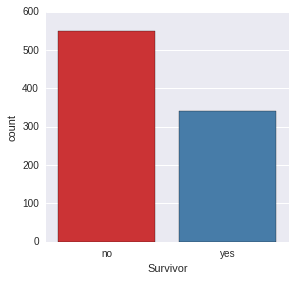

In [32]:
# Create a new column for legibility purposes through mapping
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Overview of survied vs died. 
sns.factorplot('Survivor',kind='count',data=titanic_df,palette='Set1')

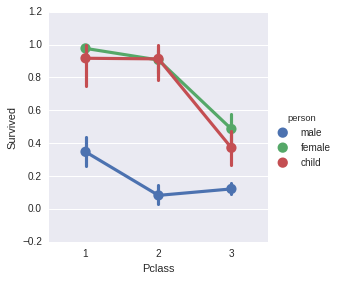

In [41]:
# Factor plot with class and gender
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

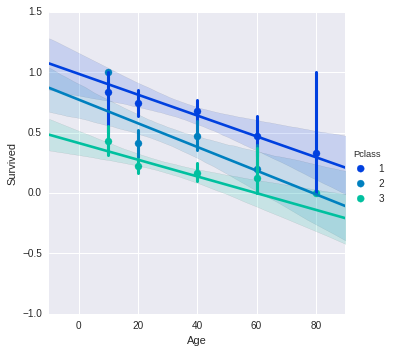

In [42]:
# Linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

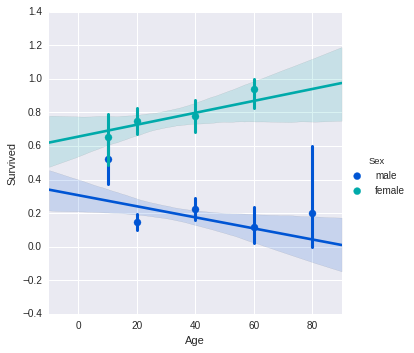

In [44]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)